### Haberman Breast Cancer Survival Dataset

In [1]:
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# load the haberman dataset and summarize the shape
# define the location of the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'

In [3]:
# load the dataset
df = pd.read_csv(url, header=None)

In [4]:
# summarize shape
df.shape

(306, 4)

In [5]:
# show summary statistics and plots of the haberman dataset
# show summary statistics
df.describe()

,0,1,2,3
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


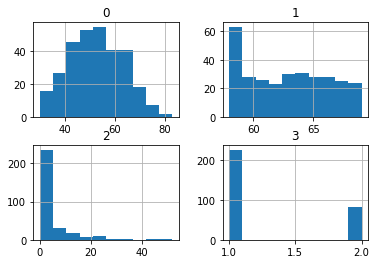

In [6]:
# plot histograms
df.hist()
plt.show()

In [7]:
# summarize the class ratio of the haberman dataset
# define the dataset column names
columns = ['age', 'year', 'nodes', 'class']
df.columns = columns

In [8]:
# summarize the class distribution
target = df['class'].values
counter = Counter(target)

for k, v in counter.items():
    per = v / len(target) * 100
    print('Class=%d. Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1. Count=225, Percentage=73.529%
Class=2. Count=81, Percentage=26.471%


### Neural Network Learning Dynamics

In [9]:
# split into input and output columns
X = df.iloc[:, 0:3]
y = df.iloc[:, -1]

In [10]:
# ensure all data are floating point values
X = X.astype('float32')

In [11]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [12]:
# split into train and test datasets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=3)

In [13]:
# determine the number of input features
n_features = X.shape[1]

In [14]:
# define model
model = keras.Sequential()
model.add(keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [16]:
# fit the model
history = model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0, validation_data=(x_test, y_test))

In [17]:
# predict test set
yhat = model.predict_classes(x_test)

C:\Users\Mark.Voytov\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [18]:
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % score)

Accuracy: 0.739


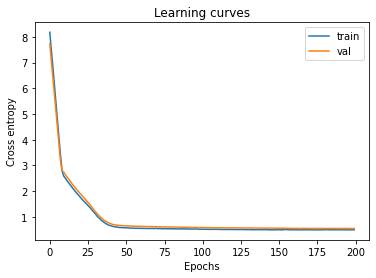

In [19]:
# plot learning curves
plt.title('Learning curves')
plt.xlabel('Epochs')
plt.ylabel('Cross entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

### Robust Model Evaluation

In [20]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
df = pd.read_csv(path, header=None)

In [21]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

In [22]:
# ensure all data are floating point values
X = X.astype('float32')

In [23]:
# encode strings to integer
y = LabelEncoder().fit_transform(y)

In [24]:
# prepare cross validation
kfold = StratifiedKFold(10)

In [25]:
# enumerate splits
scores = list()
for train_ix, test_ix in kfold.split(X, y):
    # split data
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
    # determine the number of input features
    n_features = X.shape[1]
    # define model
    model = keras.Sequential()
    model.add(keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    # compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy')
    # fit the model
    model.fit(X_train, y_train, epochs=200, batch_size=16, verbose=0)
    # predict test set
    yhat = model.predict_classes(X_test)
    # evaluate predictions
    score = accuracy_score(y_test, yhat)
    print('>%.3f' % score)
    scores.append(score)
# summarize all scores
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

C:\Users\Mark.Voytov\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


>0.742
>0.806
>0.742
>0.839
>0.742
>0.677
>0.767
>0.767
>0.767
>0.700
Mean Accuracy: 0.755 (0.044)
